In [1]:
# ---  give the path
import sys
sys.path.insert(0, '/Users/mehdi/github/pipeline')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import os

from sysnet import (load_data, train_val, 
                    NLayerNet, evaluate, LRFinder)

from torch.optim import AdamW
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts

ModuleNotFoundError: No module named 'sysnet'

1. find device

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

2. load data

In [4]:
# ---  load data
dataloaders, data_len, stats = load_data('/Users/mehdi/eBOSS.ELG.NGC.DR7.table.fits', 512)

3. find learning rate

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()



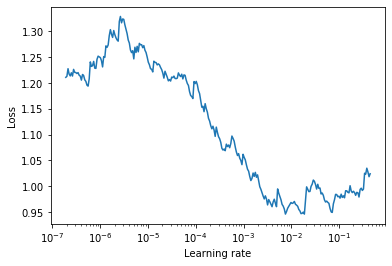

In [5]:
# --- find learning rate
model = NLayerNet()

optimizer = AdamW(params=model.parameters(),
                  lr=1.0e-7,
                  betas=(0.9, 0.999),
                  eps=1e-08,
                  weight_decay=0.01,
                  amsgrad=False)

criterion = nn.MSELoss(reduction='mean')

lr_finder = LRFinder(model, optimizer, criterion, device=device)
lr_finder.range_test(dataloaders['train'], end_lr=1, num_iter=300)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset()

4. compile model with the best learning rate

In [6]:
lr_best = 1.0e-3
eta_min = 1.0e-5
model = NLayerNet()

optimizer = AdamW(params=model.parameters(),
                  lr=lr_best,
                  betas=(0.9, 0.999),
                  eps=1e-08,
                  weight_decay=0.01,
                  amsgrad=False)

scheduler = CosineAnnealingWarmRestarts(optimizer,
                                       T_0=10,
                                       T_mult=2,
                                       eta_min=eta_min)

criterion = nn.MSELoss(reduction='mean')

nepochs = 20
output_path = '../checkpoints/model_test.pt'

5. train 

In [7]:
train_losses, val_losses = train_val(model, 
                                    dataloaders,
                                    data_len, 
                                    criterion, 
                                    optimizer, 
                                    nepochs, 
                                    output_path, 
                                    device,
                                    scheduler)

Epoch 00/19 train loss: 0.959 valid loss: 0.925 lr: 0.000976
Epoch 01/19 train loss: 0.930 valid loss: 0.917 lr: 0.000906
Epoch 02/19 train loss: 0.919 valid loss: 0.906 lr: 0.000797
Epoch 03/19 train loss: 0.910 valid loss: 0.905 lr: 0.000659
Epoch 04/19 train loss: 0.903 valid loss: 0.898 lr: 0.000506
Epoch 05/19 train loss: 0.897 valid loss: 0.895 lr: 0.000353
Epoch 06/19 train loss: 0.891 valid loss: 0.893 lr: 0.000215
Epoch 07/19 train loss: 0.887 valid loss: 0.892 lr: 0.000105
Epoch 08/19 train loss: 0.883 valid loss: 0.890 lr: 0.000034
Epoch 09/19 train loss: 0.883 valid loss: 0.891 lr: 0.000010
EarlyStopping counter: 1/10
Epoch 10/19 train loss: 0.894 valid loss: 0.893 lr: 0.000994
EarlyStopping counter: 2/10
Epoch 11/19 train loss: 0.891 valid loss: 0.895 lr: 0.000976
EarlyStopping counter: 3/10
Epoch 12/19 train loss: 0.887 valid loss: 0.892 lr: 0.000946
EarlyStopping counter: 4/10
Epoch 13/19 train loss: 0.883 valid loss: 0.888 lr: 0.000906
Epoch 14/19 train loss: 0.878 vali

Text(0.5, 0, 'epochs')

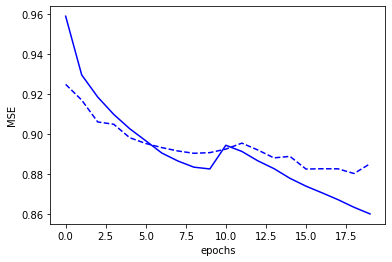

In [8]:
plt.plot(train_losses, 'b-',
        val_losses, 'b--')
plt.ylabel('MSE')
plt.xlabel('epochs')

In [3]:
import sys

In [4]:
sys.path.append('/home/mehdi/github/sysnetdev')
from sysnet.sources import DNN

  pip install torch-lr-finder -v --global-option="amp"


In [5]:
model = DNN(4, 20, 18, 1)

In [ ]:
from tor

In [10]:
# --- load model
model.load_state_dict(torch.load('../checkpoints/model_test.pt'))
criterion = nn.MSELoss(reduction='mean')

In [11]:
evaluate(model, dataloaders, data_len, criterion, phase='test')

0.8925955295562744

In [1]:
import torch

In [2]:
a = torch.ones(10)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
# --- 
# cross validation
# skortch